In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Add the directory to Python path
import sys
sys.path.append('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
%run /content/drive/MyDrive/DeepONet/utils/deeponet_lib.ipynb

Using cpu device


# Tests

## 1. Poisson Equation (finite-dimensional parameter)

Consider the following Poisson equation

$$\begin{cases}
-\sigma\Delta u(\boldsymbol{x}) = \gamma\sin(4x_1x_2) + (1-\gamma)\cos(x_1-8x_2) & \boldsymbol{x}\in\Omega\\\\
u(\boldsymbol{x})= b & \boldsymbol{x}\in\Gamma\\\\
-\nabla u(\boldsymbol{x})\cdot \boldsymbol{n}=0 & \boldsymbol{x}\in\partial\Omega\setminus\Gamma
\end{cases}$$
$$$$

where $\Omega=(0,1)^2$ is the unit square and $\Gamma=\{(0,x_2)\;:\;0\le x_2\le1\}$ is the left edge. The PDE parameters are $\boldsymbol{\mu}=[\sigma,b,\gamma]$, with $\sigma\in[0.1,1]$, $b\in[0,2]$ and $\gamma\in[0,1]$. In particular, $p=3$.

A set of PDE solutions has using numerical solver been computed and available.


In [ ]:
# Retrieve the data
mu, u = load_data(id = "1c9jCfgzie74vfhVgZueKySIZv9AHXng_")
Vh, y = get_fem_space()

Downloading...
From: https://drive.google.com/uc?id=1c9jCfgzie74vfhVgZueKySIZv9AHXng_
To: /content/data.npz
100%|██████████| 6.74M/6.74M [00:00<00:00, 76.0MB/s]


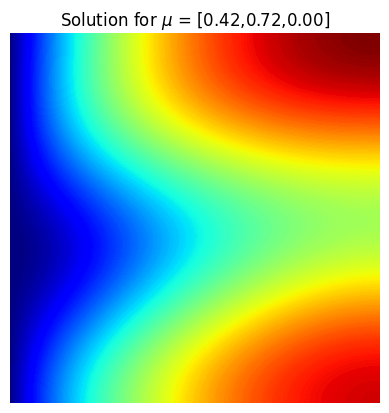

In [ ]:
plot_solution(mu[1], u[1], Vh)

In [ ]:
mu.shape, u.shape, y.shape

((500, 3), (500, 1681), (1681, 2))

## 1. Vary the dimension of latent space

In [ ]:
# Config
learning_rate = 1e-3
batch_size = 1
epochs = 40

m = mu.shape[1]
d = y.shape[1]
h = 40

In [ ]:
latent_dimensions = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 20])
latent_dimensions

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20])

In [ ]:
# Build the dataset
train_size = int(0.8 * len(mu))
val_size = int(0.1 * train_size)

dataset = FomDataset(mu, u, y)
train_set, val_set, test_set = train_val_test_split(dataset, train_size, val_size)

train_loader = DataLoader(train_set, batch_size = batch_size)
val_loader = DataLoader(val_set, batch_size = batch_size)
test_loader =  DataLoader(test_set, batch_size = batch_size)

In [ ]:
# Define loss function
loss_function = mse_loss
error_metric = error_metric

In [ ]:
trainers = []

In [ ]:
for p in latent_dimensions:
  print(f"Latent dimension = {p}")

  # Build the model
  model = DeepONet(m,d,p,h)

  # Define optimization strategy
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

  # Train the model
  trainer = Trainer(train_loader, val_loader, test_loader, model, loss_function, optimizer, epochs, error_metric)
  train_hist, val_hist, test_hist = trainer.fit()
  trainers.append(trainer)


Latent dimension = 1
Epoch 1/40:
Current Loss: 0.012113  [  351/  360]
Train Loss: 0.4507 | Val Loss: 0.0395 | Test Loss: 0.0567
Epoch 2/40:
Current Loss: 0.019848  [  351/  360]
Train Loss: 0.0331 | Val Loss: 0.0369 | Test Loss: 0.0539
Epoch 3/40:
Current Loss: 0.015259  [  351/  360]
Train Loss: 0.0291 | Val Loss: 0.0341 | Test Loss: 0.0494
Epoch 4/40:
Current Loss: 0.006954  [  351/  360]
Train Loss: 0.0250 | Val Loss: 0.0309 | Test Loss: 0.0447
Epoch 5/40:
Current Loss: 0.001848  [  351/  360]
Train Loss: 0.0220 | Val Loss: 0.0282 | Test Loss: 0.0413
Epoch 6/40:
Current Loss: 0.001083  [  351/  360]
Train Loss: 0.0203 | Val Loss: 0.0264 | Test Loss: 0.0389
Epoch 7/40:
Current Loss: 0.000998  [  351/  360]
Train Loss: 0.0189 | Val Loss: 0.0251 | Test Loss: 0.0370
Epoch 8/40:
Current Loss: 0.000906  [  351/  360]
Train Loss: 0.0179 | Val Loss: 0.0239 | Test Loss: 0.0351
Epoch 9/40:
Current Loss: 0.001560  [  351/  360]
Train Loss: 0.0172 | Val Loss: 0.0228 | Test Loss: 0.0332
Epoch 1

In [ ]:
print(mre)

[0.0709651111625135, 0.08263148901984095, 0.07550145208835601]


In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_mre(trainer_1, trainer_2, trainer_3):
    # Get error metric history for both models
    test_hist_1 = trainer_1.test_hist['error_metric']
    test_hist_2 = trainer_2.test_hist['error_metric']
    test_hist_3 = trainer_3.test_hist['error_metric']

    plt.figure(figsize=(6, 4))

    # Plot MRE for Model 1
    plt.semilogx(test_hist_1, '--r', label=f'Model 1 p=3', color='red')

    # Plot MRE for Model 2
    plt.semilogx(test_hist_2, '--m', label=f'Model 2 p=9',  color='blue')

    # Plot MRE for Model 3
    plt.semilogx(test_hist_3, '--', label=f'Model 3 p=20', color='green')

    plt.xlabel('Epochs')
    plt.ylabel('MRE')
    plt.ylim(0, 0.1)  # Cap the y-axis at 0.2
    plt.legend()
    plt.title('Comparison of MRE for Two Models')
    plt.show()


<ipython-input-111-a95e6bb3d7e1>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.semilogx(test_hist_1, '--r', label=f'Model 1 p=3', color='red')
<ipython-input-111-a95e6bb3d7e1>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--m" (-> color='m'). The keyword argument will take precedence.
  plt.semilogx(test_hist_2, '--m', label=f'Model 2 p=9',  color='blue')


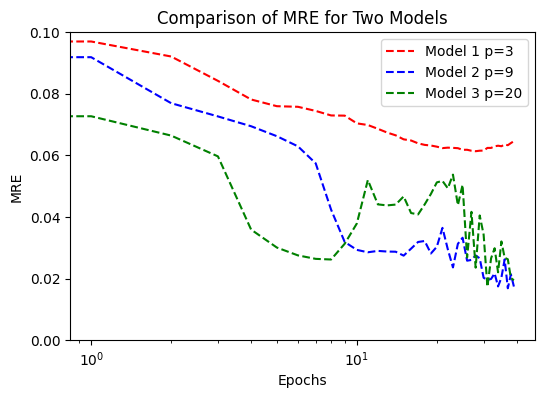

In [ ]:
trainer_1 = trainers[1] #3
trainer_2 = trainers[4] #9
trainer_3 = trainers[-1] #20

plot_comparison_mre(trainer_1, trainer_2,trainer_3)

## 2. Vary the number of training data

In [ ]:
# Config
learning_rate = 1e-3
batch_size = 1
epochs = 40

m = mu.shape[1]
d = y.shape[1]
h = 40

In [ ]:
latent_dimensions = np.array([3, 9, 20])
train_sizes = np.array([100, 200, 300, 400])

In [ ]:
# Define loss function
loss_function = mse_loss
error_metric = error_metric

In [ ]:
trainers_vs_p = []
trainers_vs_trainings_samples = []

In [ ]:
for train_size in train_sizes:
  print(f"Train size = {train_size}")

  # Build the dataset
  val_size = int(0.1 * train_size)

  dataset = FomDataset(mu, u, y)
  train_set, val_set, test_set = train_val_test_split(dataset, train_size, val_size)

  train_loader = DataLoader(train_set, batch_size = batch_size)
  val_loader = DataLoader(val_set, batch_size = batch_size)
  test_loader =  DataLoader(test_set, batch_size = batch_size)

  for p in latent_dimensions:
    print(f"Latent dimension = {p}")

    # Build the model
    model = DeepONet(m,d,p,h)

    # Define optimization strategy
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # Train the model
    trainer = Trainer(train_loader, val_loader, test_loader, model, loss_function, optimizer, epochs, error_metric)
    train_hist, val_hist, test_hist = trainer.fit()
    trainers_vs_p.append(trainer)

  trainers_vs_trainings_samples.append(trainers_vs_p)
  trainers_vs_p = []

Train size = 100
Latent dimension = 3
Epoch 1/40:
Current Loss: 0.028753  [   81/   90]
Train Loss: 0.8295 | Val Loss: 0.1125 | Test Loss: 0.2409
Epoch 2/40:
Current Loss: 0.008436  [   81/   90]
Train Loss: 0.1567 | Val Loss: 0.0445 | Test Loss: 0.0630
Epoch 3/40:
Current Loss: 0.012537  [   81/   90]
Train Loss: 0.0498 | Val Loss: 0.0398 | Test Loss: 0.0437
Epoch 4/40:
Current Loss: 0.012305  [   81/   90]
Train Loss: 0.0414 | Val Loss: 0.0331 | Test Loss: 0.0385
Epoch 5/40:
Current Loss: 0.011694  [   81/   90]
Train Loss: 0.0377 | Val Loss: 0.0306 | Test Loss: 0.0360
Epoch 6/40:
Current Loss: 0.011389  [   81/   90]
Train Loss: 0.0356 | Val Loss: 0.0296 | Test Loss: 0.0346
Epoch 7/40:
Current Loss: 0.011223  [   81/   90]
Train Loss: 0.0343 | Val Loss: 0.0300 | Test Loss: 0.0338
Epoch 8/40:
Current Loss: 0.011305  [   81/   90]
Train Loss: 0.0333 | Val Loss: 0.0305 | Test Loss: 0.0330
Epoch 9/40:
Current Loss: 0.011666  [   81/   90]
Train Loss: 0.0322 | Val Loss: 0.0304 | Test Los

In [ ]:
def plot_mre_vs_train_size(trainer_1, trainer_2, trainer_3, trainer_4, p):
    # Get error metric history for both models
    test_hist_1 = trainer_1.test_hist['error_metric']
    test_hist_2 = trainer_2.test_hist['error_metric']
    test_hist_3 = trainer_3.test_hist['error_metric']
    test_hist_4 = trainer_4.test_hist['error_metric']

    plt.figure(figsize=(6, 4))

    # Plot MRE for Model 1
    plt.semilogx(test_hist_1, '--r', label=f'size=100', color='red')

    # Plot MRE for Model 2
    plt.semilogx(test_hist_2, '--m', label=f'size=200',  color='blue')

    # Plot MRE for Model 3
    plt.semilogx(test_hist_3, '--', label=f'size=300', color='green')

    # Plot MRE for Model 4
    plt.semilogx(test_hist_4, '--', label=f'size=400', color='black')

    plt.xlabel('Epochs')
    plt.ylabel('MRE')
    plt.ylim(0, 0.2)  # Cap the y-axis at 0.2
    plt.legend()
    plt.title(f"Mre vs training size, p={p}")
    plt.show()

<ipython-input-128-c02d7e7d07ef>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.semilogx(test_hist_1, '--r', label=f'size=100', color='red')
<ipython-input-128-c02d7e7d07ef>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--m" (-> color='m'). The keyword argument will take precedence.
  plt.semilogx(test_hist_2, '--m', label=f'size=200',  color='blue')


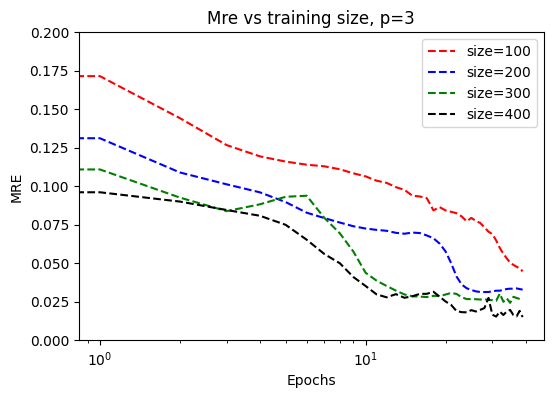

In [ ]:
trainer_1 = trainers_vs_trainings_samples[0][0] #100, 3
trainer_2 = trainers_vs_trainings_samples[1][0] #200, 3
trainer_3 = trainers_vs_trainings_samples[2][0] #300, 3
trainer_4 = trainers_vs_trainings_samples[3][0] #400, 3

plot_mre_vs_train_size(trainer_1, trainer_2, trainer_3, trainer_4, 3)

<ipython-input-128-c02d7e7d07ef>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.semilogx(test_hist_1, '--r', label=f'size=100', color='red')
<ipython-input-128-c02d7e7d07ef>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--m" (-> color='m'). The keyword argument will take precedence.
  plt.semilogx(test_hist_2, '--m', label=f'size=200',  color='blue')


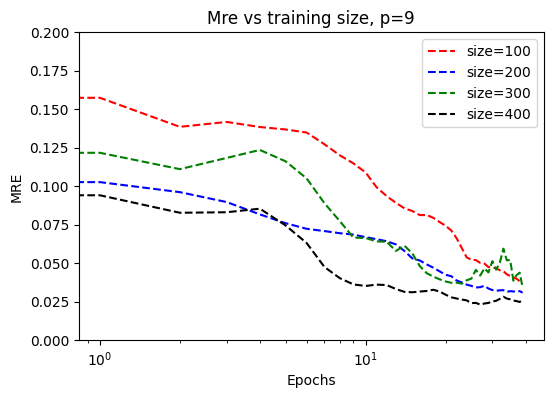

In [ ]:
trainer_1 = trainers_vs_trainings_samples[0][1] #100, 9
trainer_2 = trainers_vs_trainings_samples[1][1] #200, 9
trainer_3 = trainers_vs_trainings_samples[2][1] #300, 9
trainer_4 = trainers_vs_trainings_samples[3][1] #400, 9

plot_mre_vs_train_size(trainer_1, trainer_2, trainer_3, trainer_4, 9)

<ipython-input-128-c02d7e7d07ef>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.semilogx(test_hist_1, '--r', label=f'size=100', color='red')
<ipython-input-128-c02d7e7d07ef>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--m" (-> color='m'). The keyword argument will take precedence.
  plt.semilogx(test_hist_2, '--m', label=f'size=200',  color='blue')


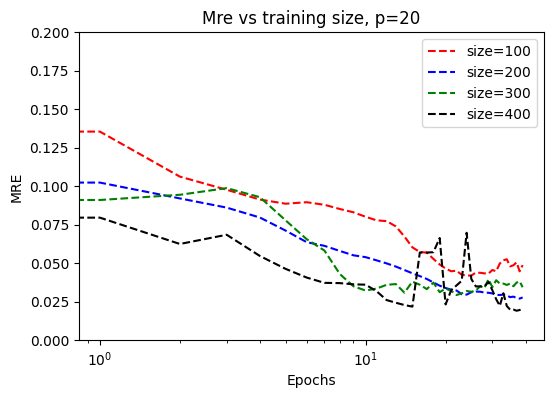

In [ ]:
trainer_1 = trainers_vs_trainings_samples[0][-1] #100, 20
trainer_2 = trainers_vs_trainings_samples[1][-1] #200, 20
trainer_3 = trainers_vs_trainings_samples[2][-1] #300, 20
trainer_4 = trainers_vs_trainings_samples[3][-1] #400, 20

plot_mre_vs_train_size(trainer_1, trainer_2, trainer_3, trainer_4, 20)

## 3. Add gaussian noise to parameter

In [ ]:
mu, u = load_data(id = "1c9jCfgzie74vfhVgZueKySIZv9AHXng_")
Vh, y = get_fem_space()

Downloading...
From: https://drive.google.com/uc?id=1c9jCfgzie74vfhVgZueKySIZv9AHXng_
To: /content/data.npz
100%|██████████| 6.74M/6.74M [00:00<00:00, 132MB/s]


In [ ]:
def add_gaussian_noise(tensor, mean=0.0, std=0.1):
    noise = torch.randn_like(tensor) * std + mean
    return tensor + noise

In [ ]:
# Config
learning_rate = 1e-3
batch_size = 1
epochs = 40

m = mu.shape[1]
d = y.shape[1]
p = 15
h = 40

In [ ]:
# Define loss function
loss_function = mse_loss
error_metric = error_metric

In [ ]:
noise_stds = np.array([0, 0.1, 0.025, 0.5])

In [ ]:
trainers = []

In [ ]:
for std in noise_stds:
  mu_noisy = add_gaussian_noise(torch.tensor(mu), std=std)

  # Build the dataset
  val_size = int(0.1 * train_size)

  dataset = FomDataset(mu_noisy, u, y)
  train_set, val_set, test_set = train_val_test_split(dataset, train_size, val_size)

  train_loader = DataLoader(train_set, batch_size = batch_size)
  val_loader = DataLoader(val_set, batch_size = batch_size)
  test_loader =  DataLoader(test_set, batch_size = batch_size)

  # Build the model
  model = DeepONet(m,d,p,h)

  # Define optimization strategy
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

  # Train the model
  trainer = Trainer(train_loader, val_loader, test_loader, model, loss_function, optimizer, epochs, error_metric)
  train_hist, val_hist, test_hist = trainer.fit()
  trainers.append(trainer)

Epoch 1/40:
Current Loss: 0.860471  [   41/  360]

<ipython-input-118-b4310c0186ce>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mu = torch.tensor(mu, dtype=torch.float32)


Current Loss: 0.025974  [  351/  360]
Train Loss: 0.1979 | Val Loss: 0.0346 | Test Loss: 0.0586
Epoch 2/40:
Current Loss: 0.008714  [  351/  360]
Train Loss: 0.0285 | Val Loss: 0.0251 | Test Loss: 0.0420
Epoch 3/40:
Current Loss: 0.001513  [  351/  360]
Train Loss: 0.0220 | Val Loss: 0.0181 | Test Loss: 0.0325
Epoch 4/40:
Current Loss: 0.001299  [  351/  360]
Train Loss: 0.0161 | Val Loss: 0.0119 | Test Loss: 0.0256
Epoch 5/40:
Current Loss: 0.001229  [  351/  360]
Train Loss: 0.0123 | Val Loss: 0.0095 | Test Loss: 0.0217
Epoch 6/40:
Current Loss: 0.001136  [  351/  360]
Train Loss: 0.0094 | Val Loss: 0.0072 | Test Loss: 0.0174
Epoch 7/40:
Current Loss: 0.001391  [  351/  360]
Train Loss: 0.0076 | Val Loss: 0.0057 | Test Loss: 0.0144
Epoch 8/40:
Current Loss: 0.001504  [  351/  360]
Train Loss: 0.0065 | Val Loss: 0.0049 | Test Loss: 0.0128
Epoch 9/40:
Current Loss: 0.001723  [  351/  360]
Train Loss: 0.0060 | Val Loss: 0.0047 | Test Loss: 0.0124
Epoch 10/40:
Current Loss: 0.003950  [  

In [ ]:
def plot_mre_vs_noise(trainer_1, trainer_2, trainer_3, trainer_4):
    # Get error metric history for both models
    test_hist_1 = trainer_1.test_hist['error_metric']
    test_hist_2 = trainer_2.test_hist['error_metric']
    test_hist_3 = trainer_3.test_hist['error_metric']
    test_hist_4 = trainer_4.test_hist['error_metric']

    plt.figure(figsize=(6, 4))

    # Plot MRE for Model 1
    plt.semilogx(test_hist_1, '--r', label=f'noise_std=0', color='red')

    # Plot MRE for Model 2
    plt.semilogx(test_hist_2, '--m', label=f'noise_std=0.1',  color='blue')

    # Plot MRE for Model 3
    plt.semilogx(test_hist_3, '--', label=f'noise_std=0.025', color='green')

    # Plot MRE for Model 4
    plt.semilogx(test_hist_4, '--', label=f'noise_std=0.5', color='black')

    plt.xlabel('Epochs')
    plt.ylabel('MRE')
    plt.ylim(0, 0.5)  # Cap the y-axis at 0.2
    plt.legend()
    plt.title(f"Mre vs gaussian noise")
    plt.show()

<ipython-input-179-dc9c475d29f9>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.semilogx(test_hist_1, '--r', label=f'noise_std=0', color='red')
<ipython-input-179-dc9c475d29f9>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--m" (-> color='m'). The keyword argument will take precedence.
  plt.semilogx(test_hist_2, '--m', label=f'noise_std=0.1',  color='blue')


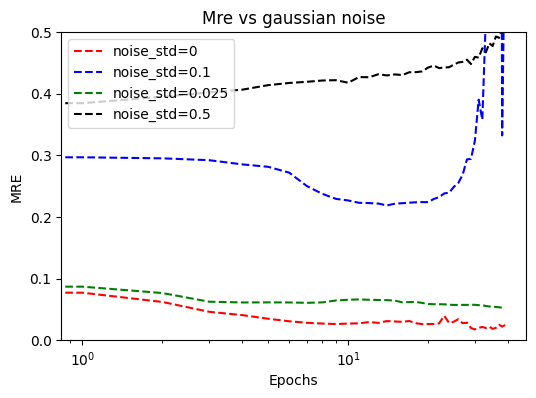

In [ ]:
trainer_1 = trainers[0]
trainer_2 = trainers[1]
trainer_3 = trainers[2]
trainer_4 = trainers[3]

plot_mre_vs_noise(trainer_1, trainer_2, trainer_3, trainer_4)